#**Exercise One**
1. Truth table
2. Network structure diagram
3. Weights and biases
4. Graphical state space representation 

*for perceptrons or MLPs that perform the following operations: AND, NAND, OR & XOR.*

In [2]:
import scipy.special as sc #importing libraries we'll need
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def perceptron(inputs_list, weights_list, bias):
  inputs = np.array(inputs_list)
  weights = np.array(weights_list)
  summed = np.dot(inputs, weights)
  summed+=bias
  output = 1 if summed > 0 else 0
  return output 

Creating list of all possible imputs and running our perceptron in AND mode

In [ ]:
inputs_list =[[0.0, 0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
weights = [1.0, 1.0]
bias = -1

In [ ]:
for i in inputs_list:
    print(i)
    #print("Weights:" ,weights)
    #print("Bias: ", bias)
    print("Result: ", perceptron(i, weights, bias))

[0.0, 0.0]
Result:  0
[0.0, 1.0]
Result:  0
[1.0, 0.0]
Result:  0
[1.0, 1.0]
Result:  1


Now let's run our perceptron in OR mode: 
w1 = 1, w2 = 1, b = -0.5

In [ ]:
weights_or = [1, 1]
bias_or = -0.5
for i in inputs_list:
    print(i)
    #print("Weights:" ,weights)
    #print("Bias: ", bias)
    print("Result: ", perceptron(i, weights_or, bias_or))

[0.0, 0.0]
Result:  0
[0.0, 1.0]
Result:  1
[1.0, 0.0]
Result:  1
[1.0, 1.0]
Result:  1


A single perceptron with an Heaviside activation function can implement each one of the fundamental logical functions: NOT, AND and OR.
They are called fundamental because any logical function, no matter how complex, can be obtained by a combination of those three. We can infer that, if we appropriately connect the three perceptrons we just built, we can implement any logical function! 

So let's build NOT gate first!

let’s pick w = -1 and b = 0.5.

Input for not is 1-dimensional

In [ ]:
def perceptron_not(input, weight=-1, bias=0.5):
  summed = input*weight+bias
  output = 1 if summed > 0 else 0
  return output
input_fot_not_test=[0,1]
for i in input_fot_not_test:
    print(i)
    #print("Weights:" ,weights)
    #print("Bias: ", bias)
    print("Result: ", perceptron_not(i))

0
Result:  1
1
Result:  0


#XOR gate

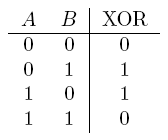

In [ ]:
def XOR_perceptron(inputs_list,weights,bias, weights_or,bias_or):
    gate_1 = np.array(perceptron(inputs_list,weights,bias))
    gate_2 = np.array(perceptron_not(gate_1))
    gate_3 = np.array(perceptron(inputs_list,weights_or,bias_or))
    new_x = np.array([gate_2, gate_3])
    output = perceptron(new_x,weights,bias)
    return output

In [ ]:
for i in inputs_list:
    print(i)
    print("Result: ", XOR_perceptron(i,weights,bias,weights_or,bias_or))

[0.0, 0.0]
Result:  0
[0.0, 1.0]
Result:  1
[1.0, 0.0]
Result:  1
[1.0, 1.0]
Result:  0


#NAND gate

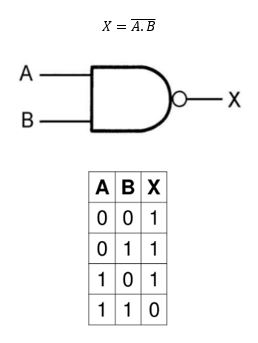 

In [ ]:
def NAND_perceptron(inputs_list,weights,bias):
    return perceptron_not(perceptron(inputs_list,weights,bias))

In [ ]:
for i in inputs_list:
  print(i)
  print(NAND_perceptron(i,weights,bias))

[0.0, 0.0]
1
[0.0, 1.0]
1
[1.0, 0.0]
1
[1.0, 1.0]
0


#Vector space of input vectors and (if they exist) linear separators of all above perceptrons:

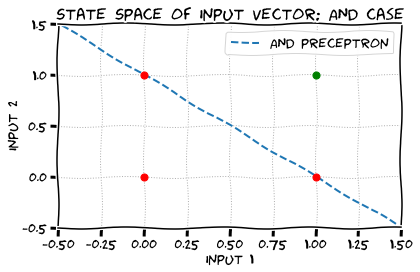

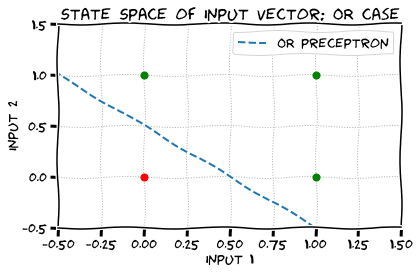

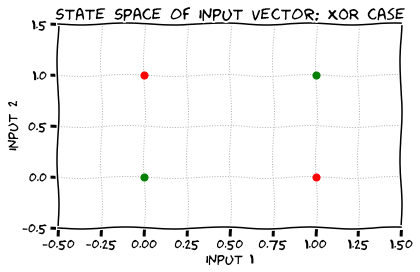

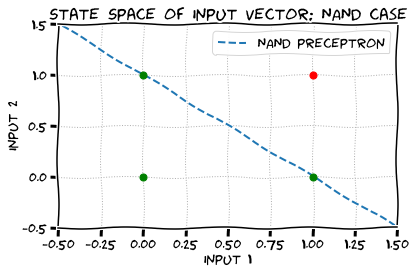

In [ ]:
 fig = plt.xkcd()
plt.scatter(0, 0, s=50, color="red", zorder=3) 
plt.scatter(0, 1, s=50, color="red", zorder=3) 
plt.scatter(1, 0, s=50, color="red", zorder=3) 
plt.scatter(1, 1, s=50, color="green", zorder=3) 
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
x = np.linspace(-1, 10, 1000)
plt.plot(x, -(weights[1]/weights[0])*x-bias/weights[0], linestyle='dashed',label='AND preceptron')
plt.legend()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: AND case")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

fig_or = plt.xkcd()
plt.scatter(0, 0, s=50, color="red", zorder=3) 
plt.scatter(0, 1, s=50, color="green", zorder=3) 
plt.scatter(1, 0, s=50, color="green", zorder=3) 
plt.scatter(1, 1, s=50, color="green", zorder=3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
x = np.linspace(-1, 10, 1000)
plt.plot(x, -(weights_or[1]/weights_or[0])*x-bias_or/weights_or[0], linestyle='dashed',label='OR preceptron')
plt.legend()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: OR case")
plt.grid(True, linewidth=1, linestyle=':') 
plt.tight_layout()
plt.show()

fig_xor = plt.xkcd()
plt.scatter(0, 0, s=50, color="green", zorder=3) 
plt.scatter(0, 1, s=50, color="red", zorder=3) 
plt.scatter(1, 0, s=50, color="red", zorder=3) 
plt.scatter(1, 1, s=50, color="green", zorder=3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: XOR case")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

fig_nand = plt.xkcd()
plt.scatter(0, 0, s=50, color="green", zorder=3) 
plt.scatter(0, 1, s=50, color="green", zorder=3) 
plt.scatter(1, 0, s=50, color="green", zorder=3) 
plt.scatter(1, 1, s=50, color="red", zorder=3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
x = np.linspace(-1, 10, 1000)
plt.plot(x, -(weights[1]/weights[0])*x-bias/weights[0], linestyle='dashed',label='NAND preceptron')
plt.legend()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: NAND case")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()



#**Exercice 2**



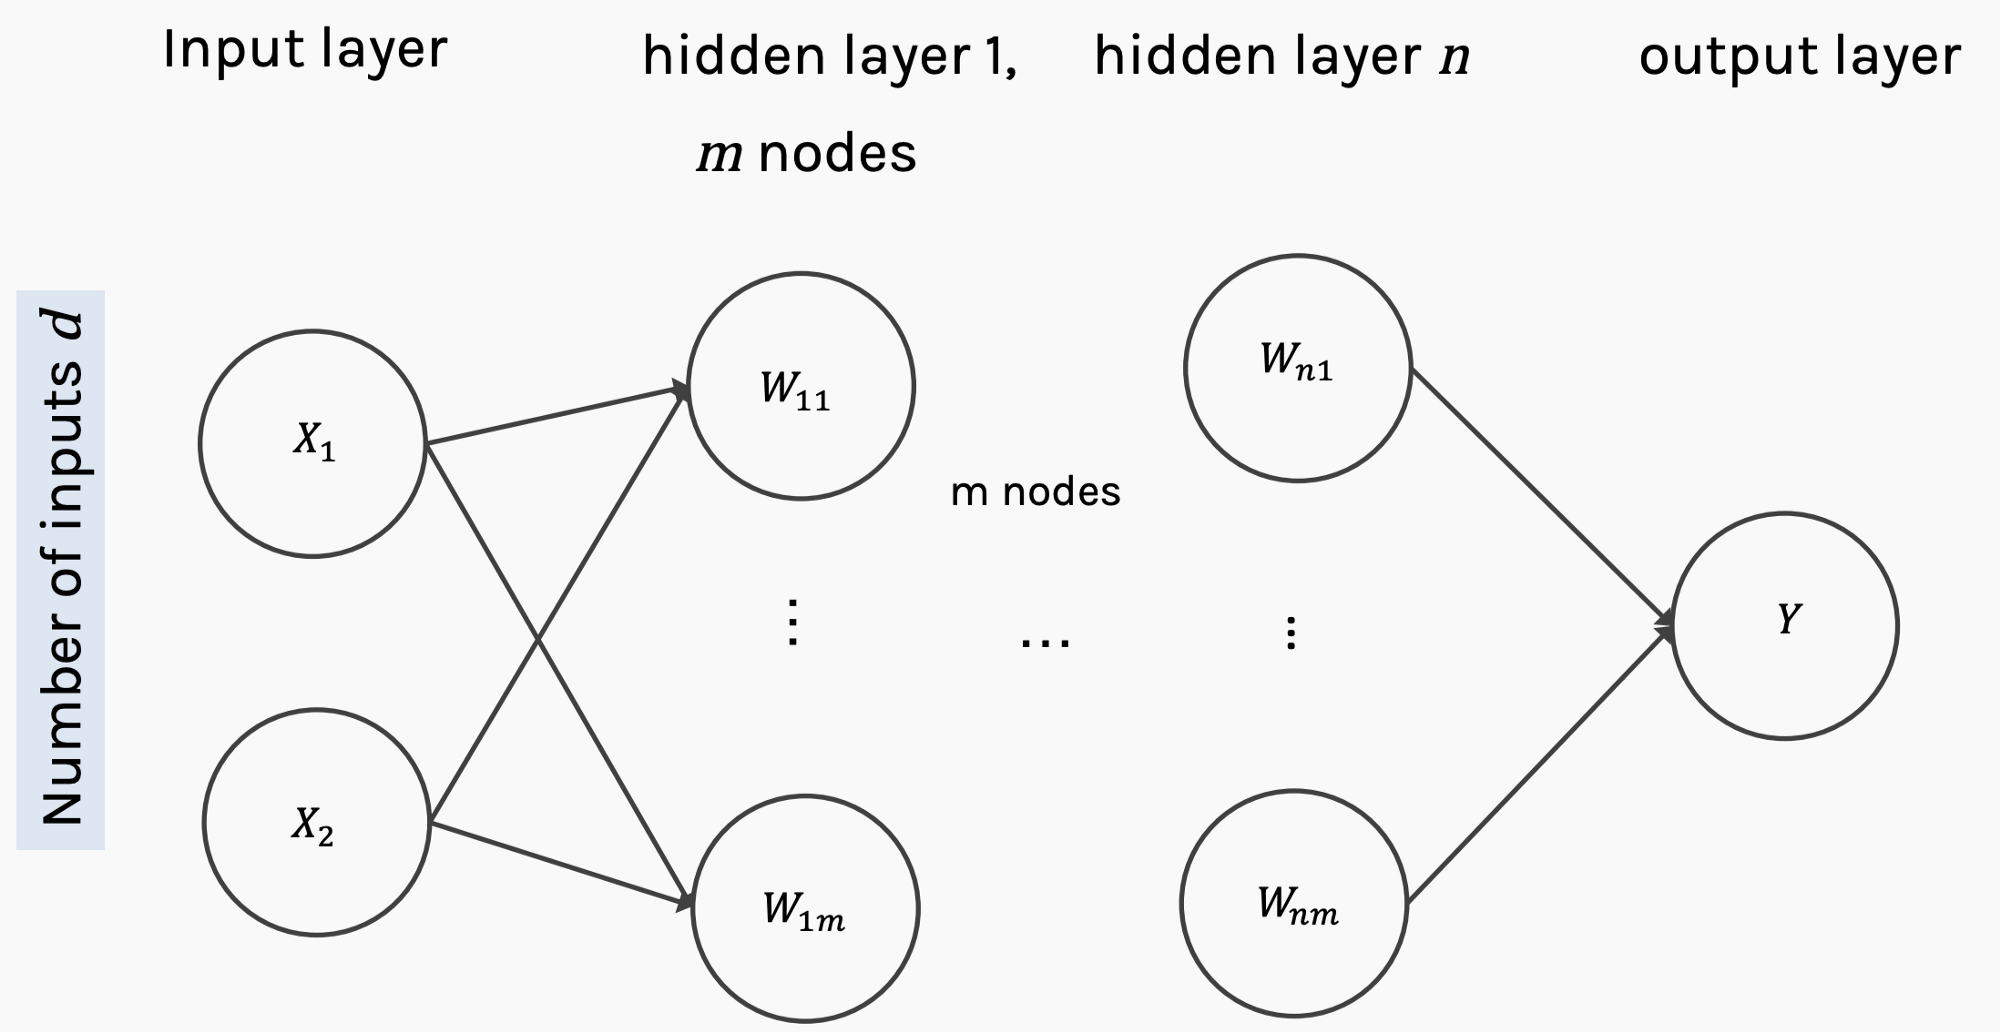

#MNIST

In [4]:
import scipy.special as ss

class NeuralNetwork:
  def _init_ (self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    # Set the number of nodes in each input, hidden and output layer
    self.i_nodes = input_nodes
    self.h_nodes = hidden_nodes 
    self.o_nodes = output_nodes # Weight matrices, wih (input -> hidden) and who (hidden -> output)
    self.wih = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes)) 
    self.who = np.random.normal(0.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes))
    # Set the learning rate 
    self.lr = learning_rate
    # Set the activation function, the logistic sigmoid 
    self.activation_function = lambda x: ss.expit(x)
  def train(self, inputs_list, targets_list):
   inputs_array = np.array(inputs_list, ndmin=2).T 
   targets_array = np.array(targets_list, ndmin=2).T
   hidden_inputs = np.dot(self.wih, inputs_array)
   hidden_outputs = self.activation_function(hidden_inputs)
   final_inputs = np.dot(self.who, hidden_outputs)
# Calculate the signals emerging from final output layer 
   final_outputs = self.activation_function(final_inputs)
# Current error is (target - actual) 
   output_errors = targets_array - final_outputs
# Hidden layer errors are the output errors, split by the weights, recombined at hidden nodes 
   hidden_errors = np.dot(self.who.T, output_errors)
# Update the weights for the links between the hidden and output layers
   self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
# Update the weights for the links between the input and hidden layers
   self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),np.transpose(inputs_array))
# Query the network
  def query(self, inputs_list):
    inputs_array = np.array(inputs_list, ndmin=2).T
# Calculate signals into hidden layer 
    hidden_inputs = np.dot(self.wih, inputs_array)
# Calculate output from the hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
# Calculate signals into final layer
    final_inputs = np.dot(self.who, hidden_outputs)
# Calculate outputs from the final layer 
    final_outputs =self.activation_function(final_inputs)
    return final_outputs


Let's see how our MNIST data looks like:

In [ ]:
import pandas as pd
train_data = pd.read_csv('/mnist_train_100.csv') 
train_data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


"The input will be a vector of 784 pixels==input nodes. 

The output needs to tell us what number the
network thinks was in the image, the easiest way to do this is to have 10 output nodes, each 
one corresponding to the probability that the image contained that number. So, for example a 
value of 0.99 at output node 0 would mean that the network was certain that the image
contained the number 0. 

The number of hidden nodes and the learning rate are, at this stage,
best guess.

N = NeuralNetwork(self, input_nodes, hidden_nodes, 
output_nodes, learning_rate)" (week 4)

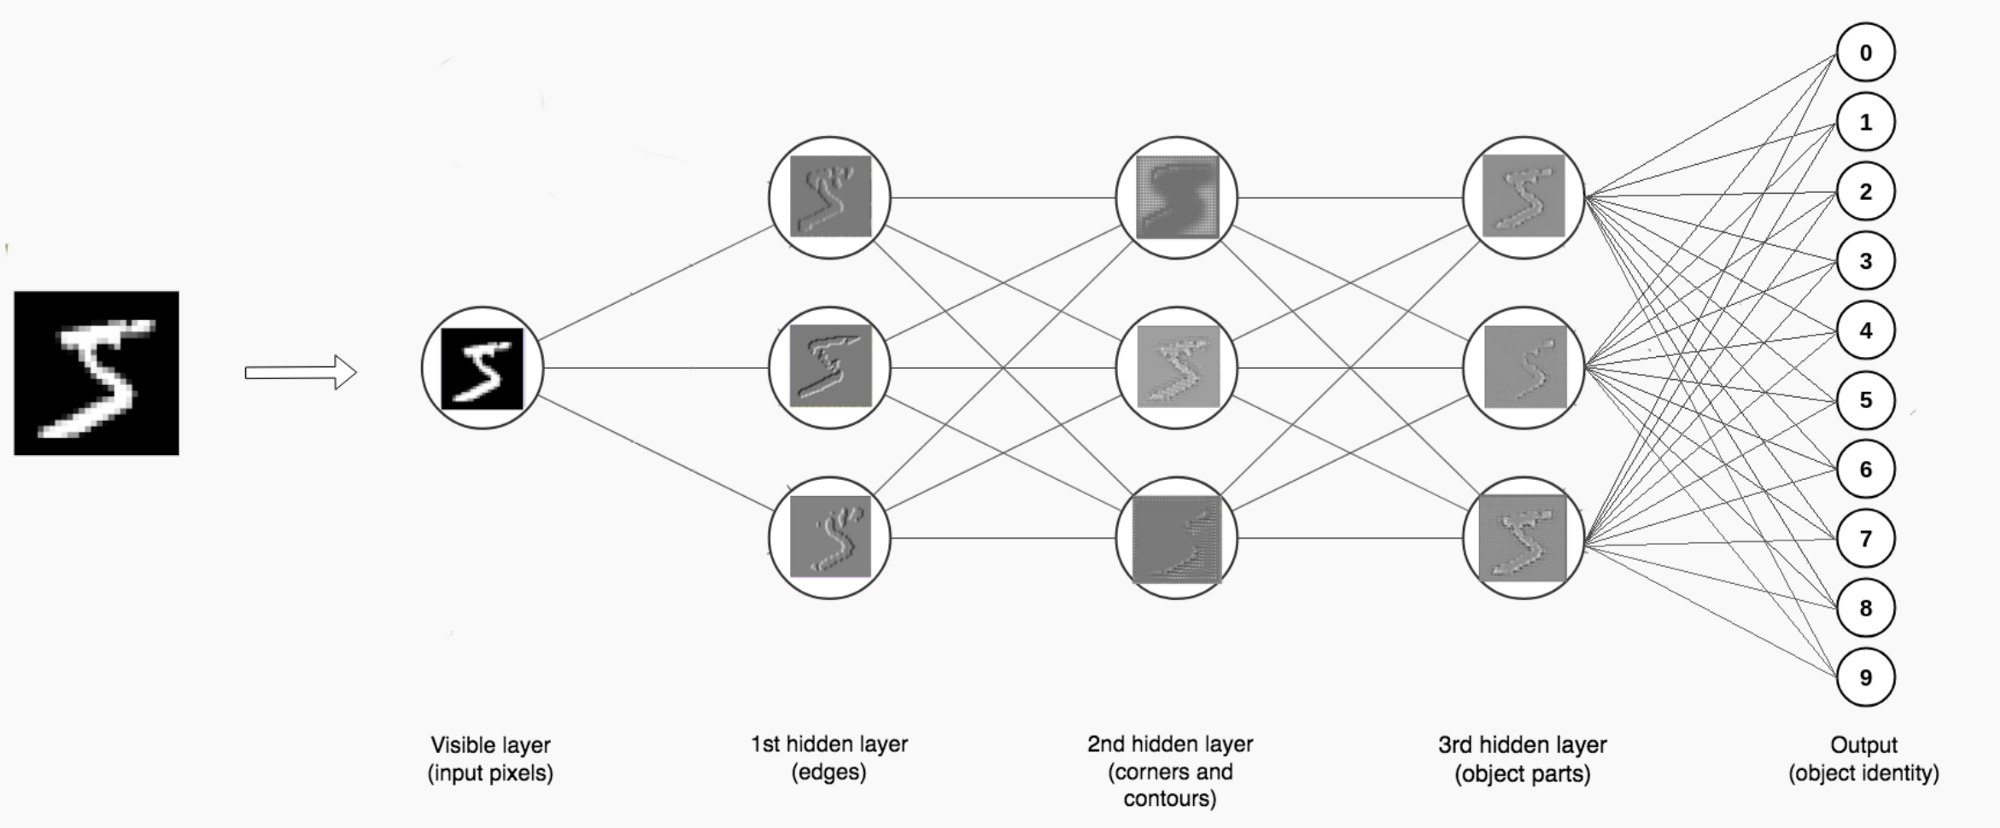

In [ ]:
Steeve = NeuralNetwork()
Steeve._init_(784,100,10,0.3)
output_nodes=10
training_data_file = open("/content/mnist_train_100.csv", 'r') 
training_data_list = training_data_file.readlines() 
training_data_file.close()
# Train the neural network on each trainingsample 
for record in training_data_list:
  all_values = record.split(',')
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[int(all_values[0])] = 0.99
  Steeve.train(inputs, targets)
  pass


In [ ]:
test_data_file = open("/mnist_test_10.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close()
# Scorecard list for how well the network performs, initially empty 
scorecard = []

7 Correct label
7 Network label 

2 Correct label
2 Network label 

1 Correct label
1 Network label 

0 Correct label
0 Network label 

4 Correct label
4 Network label 

1 Correct label
1 Network label 

4 Correct label
4 Network label 

9 Correct label
3 Network label 



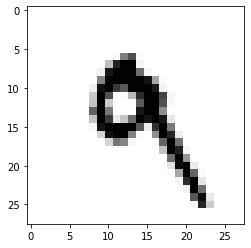

5 Correct label
1 Network label 



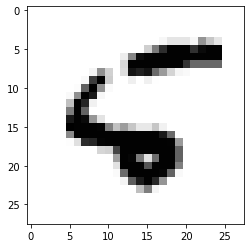

9 Correct label
7 Network label 



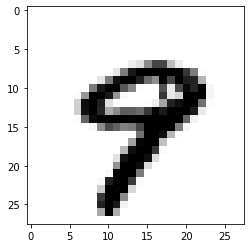

Performance =  70.0 %


In [ ]:
# Loop through all of the records in the test data set 
for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0]) 
  print(correct_label, "Correct label") 
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
  outputs = Steeve.query(inputs)
  label = np.argmax(outputs)
  print(label, "Network label",'\n') 
  if (label == correct_label):
    scorecard.append(1)
  else:
      scorecard.append(0)
      image_array = np.asfarray(all_values[1:]).reshape((28, 28))
      # Plot this 2D array as an image, use the grey colour map and don’t interpolate 
      plt.imshow(image_array, cmap='Greys', interpolation='None')
      plt.show()


  pass
pass
 
scorecard_array = np.asarray(scorecard)
print("Performance = ", (scorecard_array.sum() / scorecard_array.size)*100, '%')

The performance vary from 50 to 70%

Symbols unrecognized by neural network are in many cases recognizible by a human (or I've seen lots of bad handwriting)

Performance may be not so good because of a small train set, now we try on the larger one creating a new object of the Network class, but first let's look at our new mnist_train data file:

In [ ]:
train_data_big = pd.read_csv('/content/mnist_train.csv') 
print(len(train_data_big))

59999


Here we have 59999 lines

In [ ]:
Dustin = NeuralNetwork()
Dustin._init_(784,500,10,0.04)#changing parameters in the experiment
output_nodes=10
training_data_file = open("/mnist_train.csv", 'r') 
training_data_list = training_data_file.readlines() 
training_data_file.close()
# Train the neural network on each trainingsample 
for record in training_data_list:
  all_values = record.split(',')
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[int(all_values[0])] = 0.99
  Dustin.train(inputs, targets)
  pass


In [ ]:
test_data_file = open("/mnist_test.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close() 
scorecard = []

In [ ]:
for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0]) 
  #print(correct_label, "Correct label") 
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
  outputs = Dustin.query(inputs)
  label = np.argmax(outputs)
  #print(label, "Network label",'\n') 
  if (label == correct_label):
    scorecard.append(1)
  else:
      scorecard.append(0)
  pass
pass
 
scorecard_array = np.asarray(scorecard)
print("Performance = ", (scorecard_array.sum() / scorecard_array.size)*100, '%')

Performance =  95.39999999999999 %


Trying out different learning rate (500 nodes; time for training approximately 2 min):


Performance%  - Learning rate

90.85	-   0.5

91.09  -	0.3

93.5   -	0.2

94.7  - 	0.1

94.89 -	0.05

95.4 -	0.04

94.65 -	0.03

93.97 -	0.001

92.69 -	0.0001


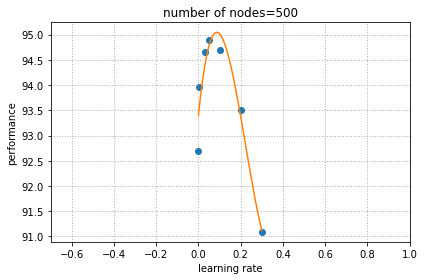

In [ ]:

x=[0.3,0.2,0.1,0.03,0.05,0.001,0.00001]
y=[91.09,93.5,94.7,94.65,94.9,93.97,92.69]
plt.xlabel("learning rate")
plt.title("number of nodes=500")
plt.ylabel("performance")
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

Let's run our neural nework within a cycle of different amounts of hidden nodes and plot a graphic

In [5]:
np.random.seed(42)
for k in np.array(range(1,60,5)):
  El = NeuralNetwork()
  El._init_(784,600,10,k/100)#changing parameters in the experiment
  output_nodes=10
  training_data_file = open("/content/drive/MyDrive/Coursework_A/MNIST/mnist_train.csv", 'r') 
  training_data_list = training_data_file.readlines() 
  training_data_file.close()
# Train the neural network on each trainingsample 
  for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    El.train(inputs, targets)
    pass
  test_data_file = open("/content/drive/MyDrive/Coursework_A/MNIST/mnist_test.csv", 'r') 
  test_data_list = test_data_file.readlines() 
  test_data_file.close() 
  scorecard = []
  for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0]) 
  #print(correct_label, "Correct label") 
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    outputs = El.query(inputs)
    label = np.argmax(outputs)
  #print(label, "Network label",'\n') 
    if (label == correct_label):
      scorecard.append(1)
    else:
        scorecard.append(0)
    pass
  pass
  scorecard_array = np.asarray(scorecard)
  print("Performance = ", (scorecard_array.sum() / scorecard_array.size)*100, '%')

FileNotFoundError: ignored

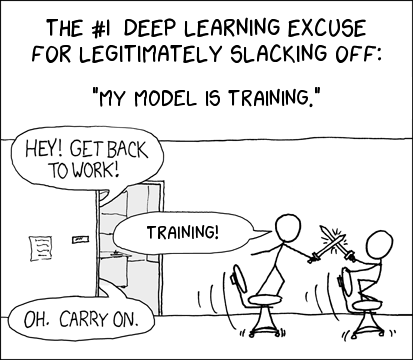

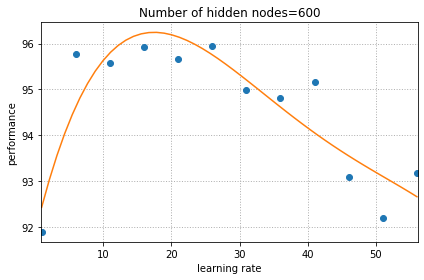

In [ ]:
x=np.array(range(1,60,5))
y=[91.9,95.77,95.57,95.92,95.66,95.94,94.98,94.81,95.17,93.08999999999999, 92.2,93.17]
plt.title("Number of hidden nodes=600")
plt.xlabel("learning rate")
plt.ylabel("performance")
z = np.polyfit(x, y, 4)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-0.1, x[-1] + 0.1 ])
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

Plotting the results:

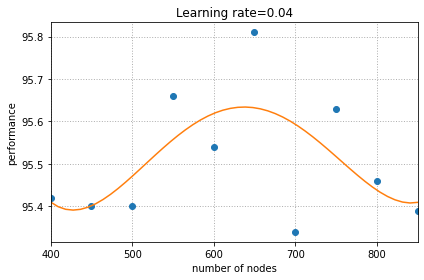

In [ ]:
x=[400,450,500,550,600,650,700,750,800,850]
y=[95.42, 95.40, 95.40,95.66,95.54,95.81,95.34,95.63,95.46,95.39]
plt.title("Learning rate=0.04")
plt.xlabel("number of nodes")
plt.ylabel("performance")
z = np.polyfit(x, y, 4)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-0.1, x[-1] + 0.1 ])
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()


As a result or the experiments:

Optimal learning rate is 0.04

Optimal number of nodes is 650



# Fashion mnist


In [ ]:
train_data = pd.read_csv('/content/fashion_mnist_train.csv') 
train_data.head()

,9,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,1,0,0,0,0,22,88,188,172,132,125,141,199,143,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,20,131,199,206,196,...,0,0,0,0,0,0,224,197,123,0,0,0,0,0,0,0,141,151,76,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,133,167,73,0,0,0


So, first number in a row is a type of fashion object, then goes the encoded image.

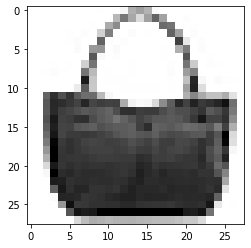

In [ ]:
  data_file = open("/content/fashion_mnist_train.csv", 'r')
  data_list = data_file.readlines()
  data_file.close()
  all_values = data_list[100].split(',')
  image_array = np.asfarray(all_values[1:]).reshape((28, 28))
  plt.imshow(image_array, cmap='Greys', interpolation='None')
  plt.show()


Amount of output nodes should be changed... Previously 10 was enough as we were dealing with numbers, but how many different objects we have right now? Let's find out

In [ ]:
  data_file = open("/content/fashion_mnist_train.csv", 'r')
  data_list = data_file.readlines()
  data_file.close()
  accesoires=[None]*60000
  c=0
  for i in data_list:
    all_values = i.split(',')
    accesoires[c]=i[0]
    c+=1
  unique_accesoires = list(set(accesoires))
  print(unique_accesoires)

['6', '2', '0', '9', '4', '1', '7', '8', '5', '3']


10 types of objects, so we'll use 10 output nodes again.

In [ ]:
Max = NeuralNetwork()
Max._init_(784,500,10,0.04)
output_nodes=10
training_data_file = open("/content/drive/MyDrive/Coursework_A/fashion_MNIST/fashion_mnist_train.csv", 'r') 
training_data_list = training_data_file.readlines() 
training_data_file.close()
# Train the neural network on each trainingsample 
for record in training_data_list:
  all_values = record.split(',')
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[int(all_values[0])] = 0.99
  Max.train(inputs, targets)
  pass


In [ ]:
test_data_file = open("/content/drive/MyDrive/Coursework_A/fashion_MNIST/fashion_mnist_test.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close() 
scorecard = []

In [ ]:
for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0]) 
  #print(correct_label, "Correct label") 
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
  outputs = Max.query(inputs)
  label = np.argmax(outputs)
  #print(label, "Network label",'\n') 
  if (label == correct_label):
    scorecard.append(1)
  else:
      scorecard.append(0)
  pass
pass
 
scorecard_array = np.asarray(scorecard)
print("Performance = ", (scorecard_array.sum() / scorecard_array.size)*100, '%')

Performance =  83.85000000000001 %


#Optimizing (fashion mnist)


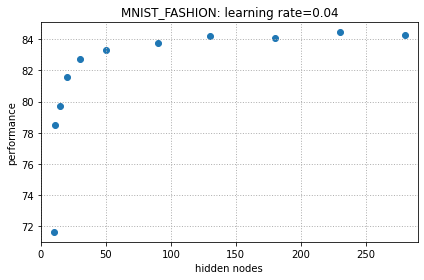

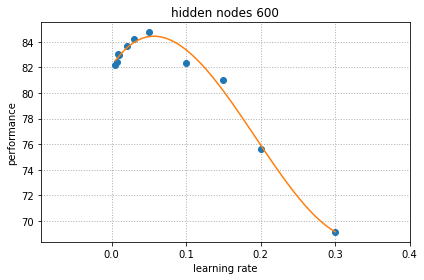

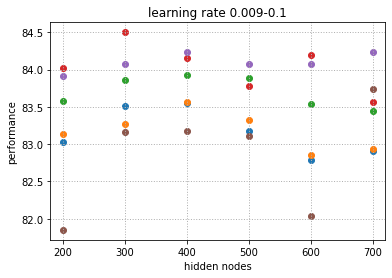

In [ ]:
best_performance=0.0
best_hn=0
best_lr=0
np.random.seed(42)
for k in [0.04,0.05,0.06,0.07,0.08,0.1,0.2,0.3]:
  for j in [500,600,700,800,900,1000]:
   El = NeuralNetwork()
   El._init_(784,j,10,k)#changing parameters in the experiment
   output_nodes=10
   training_data_file = open("/content/drive/MyDrive/Coursework_A/fashion_MNIST/fashion_mnist_train.csv", 'r') 
   training_data_list = training_data_file.readlines() 
   training_data_file.close()
# Train the neural network on each trainingsample 
   for record in training_data_list:
     all_values = record.split(',')
     inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
     targets = np.zeros(output_nodes) + 0.01
     targets[int(all_values[0])] = 0.99
     El.train(inputs, targets)
     pass
   test_data_file = open("/content/drive/MyDrive/Coursework_A/fashion_MNIST/fashion_mnist_test.csv", 'r') 
   test_data_list = test_data_file.readlines() 
   test_data_file.close() 
   scorecard = []
   for record in test_data_list:
     all_values = record.split(',')
     correct_label = int(all_values[0]) 
  #print(correct_label, "Correct label") 
     inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
     outputs = El.query(inputs)
     label = np.argmax(outputs)
  #print(label, "Network label",'\n') 
     if (label == correct_label):
       scorecard.append(1)
     else:
         scorecard.append(0)
     pass
   pass
   scorecard_array = np.asarray(scorecard)
   if (best_performance < (scorecard_array.sum()/scorecard_array.size)):
     best_performance=scorecard_array.sum() / scorecard_array.size
     best_lr=k
     best_hn=j
   else: 
     print("local best performance: ", best_performance)
     pass
   pass
pass



print("Best performance = ", best_performance*100," best lr: ",k," best hn ",j)

local best performance:  0.8414
local best performance:  0.8414
local best performance:  0.8414
local best performance:  0.8414
local best performance:  0.8435
local best performance:  0.8435
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
local best performance:  0.844
lo

#Alternative methods to improve the overall score on both data sets


Non-convex optimization involves a function which has multiple optima, only one of which is the global optima. Depending on the loss surface, it can be very difficult to locate the global optima.
What is a reasonable learning rate to use? Too small a learning rate takes too long to converge, and too large a learning rate will mean that the network will not converge.


    Sigmoids suffer from the vanishing gradient problem.
    Sigmoids are not zero centered; gradient updates go too far in different directions, making optimization more difficult.
    Sigmoids saturate and kill gradients.
    Sigmoids have slow convergence.



Neural network with n hidden layers. As features at the first layer are propagated through the network, they undergo affine transformations followed by an activation function. If the values are less than 1, the gradients will quickly tend to zero. If computers were capable of storing infinitely small numbers then this would not be a problem, but computers only store values to a finite number of decimal places. If the gradient value becomes smaller than this value, it will just be recognized as zero.